### Notebook used to visualise the OGTT response for the MIRLIR and healthy groups generated.

In [1]:
using CairoMakie
using CSV 
using DataFrames

In [2]:
file_path_healthy = "C:/Users/20192809/Documents/GitHub/EDES/MIRLIR_pipeline/Metadata/Training_healthy_OGTT.csv"
file_path_MIR = "C:/Users/20192809/Documents/GitHub/EDES/MIRLIR_pipeline/Metadata/Training_MIR_OGTT.csv"
file_path_LIR = "C:/Users/20192809/Documents/GitHub/EDES/MIRLIR_pipeline/Metadata/Training_LIR_OGTT.csv"

data_healthy = CSV.read(file_path_healthy, DataFrame)
data_MIR = CSV.read(file_path_MIR, DataFrame)
data_LIR = CSV.read(file_path_LIR, DataFrame);

test_healthy = CSV.read("C:/Users/20192809/Documents/GitHub/EDES/MIRLIR_pipeline/Metadata/Test_healthy_OGTT.csv", DataFrame)
test_MIR = CSV.read("C:/Users/20192809/Documents/GitHub/EDES/MIRLIR_pipeline/Metadata/Test_MIR_OGTT.csv", DataFrame)
test_LIR = CSV.read("C:/Users/20192809/Documents/GitHub/EDES/MIRLIR_pipeline/Metadata/Test_LIR_OGTT.csv", DataFrame);

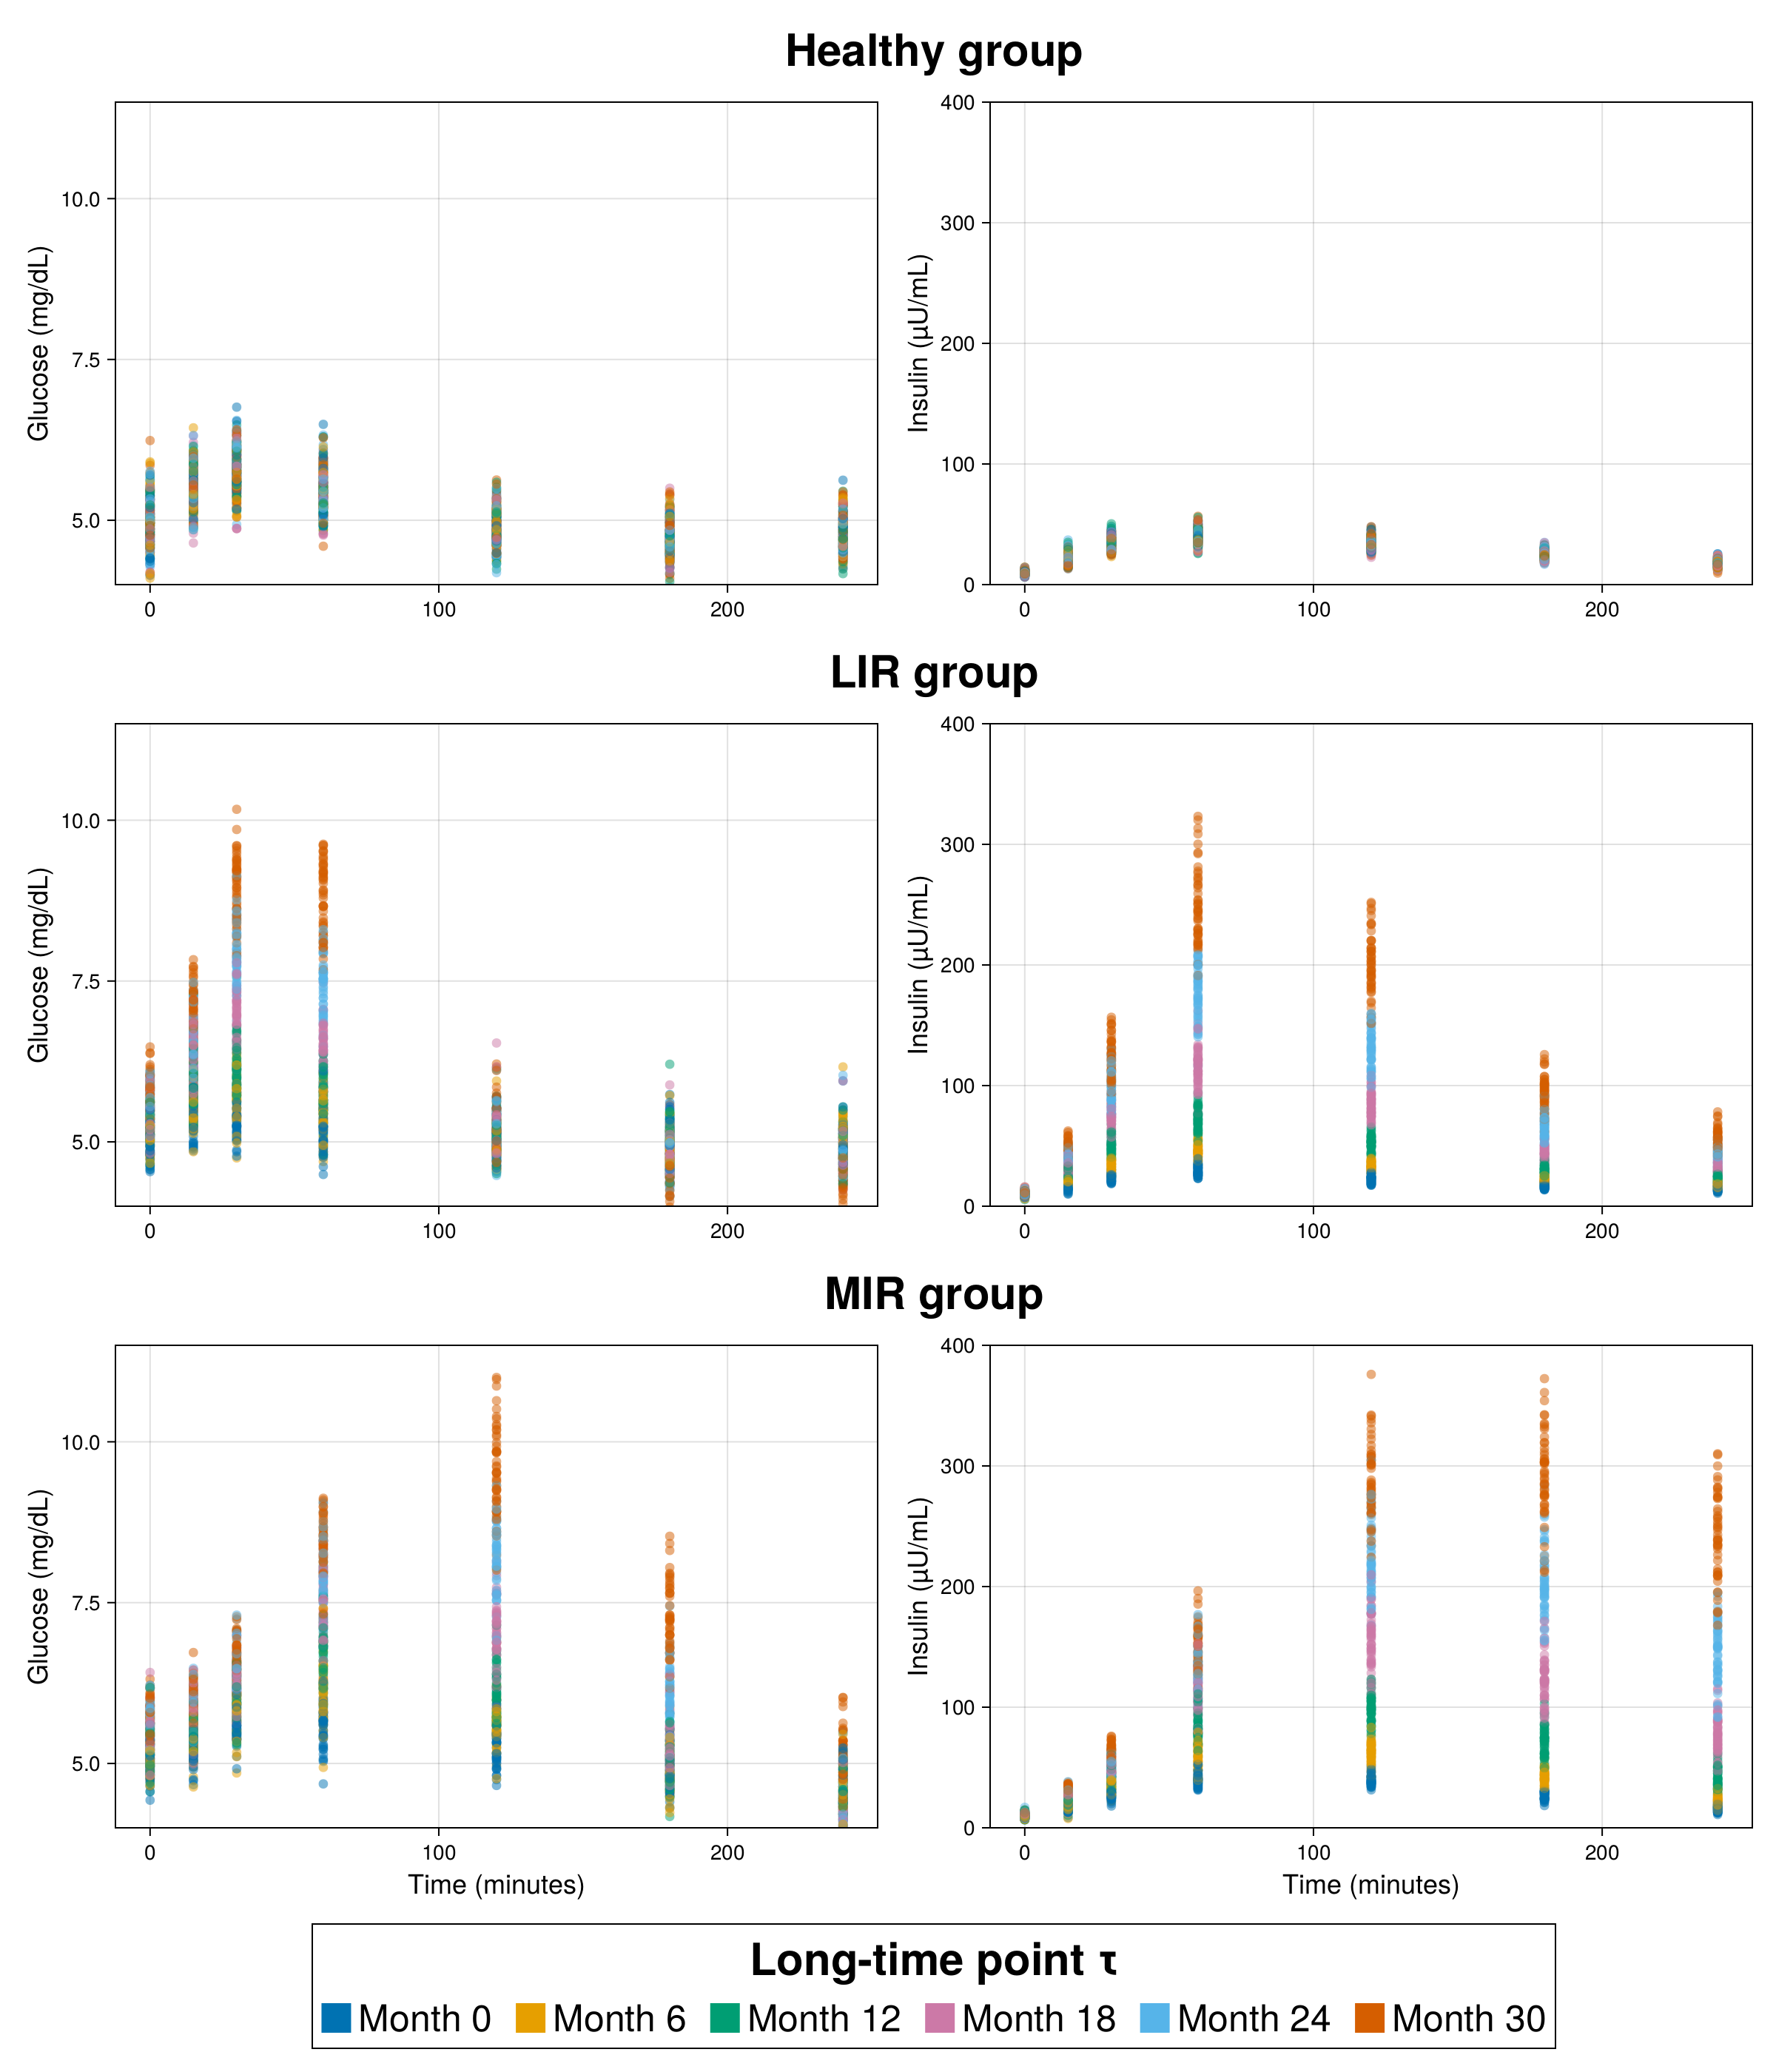

CairoMakie.Screen{IMAGE}


In [4]:
using CairoMakie

# Extract relevant columns
glucose_cols = ["glucose_t_0", "glucose_t_15", "glucose_t_30", "glucose_t_60", "glucose_t_120", "glucose_t_180", "glucose_t_240"]
insulin_cols = ["insulin_t_0", "insulin_t_15", "insulin_t_30", "insulin_t_60", "insulin_t_120", "insulin_t_180", "insulin_t_240"]
time_points = [0, 15, 30, 60, 120, 180, 240]

# Wong color palette
colors = Makie.wong_colors()
unique_times = unique(data_healthy.Long_Time)
color_map = Dict(unique_times .=> colors[1:length(unique_times)])

# Create figure with two subplots
fig = Figure(size=(1200, 1400))
l1 = Label(fig[1,1:2], "Healthy group", fontsize = 30, font = :bold, halign = :center, justification = :center)
ax1 = Axis(fig[2, 1], ylabel="Glucose (mg/dL)", 
            xlabelsize=18, ylabelsize=18, 
            xticklabelsize=14, yticklabelsize=14)
ax2 = Axis(fig[2, 2], ylabel="Insulin (µU/mL)", 
            xlabelsize=18, ylabelsize=18, 
            xticklabelsize=14, yticklabelsize=14)

l2 = Label(fig[3,1:2], "LIR group", fontsize = 30, font = :bold, halign = :center, justification = :center)
ax3 = Axis(fig[4,1], ylabel="Glucose (mg/dL)", 
            xlabelsize=18, ylabelsize=18, 
            xticklabelsize=14, yticklabelsize=14)
ax4 = Axis(fig[4,2], ylabel="Insulin (µU/mL)",
            xlabelsize=18, ylabelsize=18, 
            xticklabelsize=14, yticklabelsize=14)

l3 = Label(fig[5,1:2], "MIR group", fontsize = 30, font = :bold, halign = :center, justification = :center)
ax5 = Axis(fig[6,1], xlabel="Time (minutes)", ylabel="Glucose (mg/dL)", 
            xlabelsize=18, ylabelsize=18, 
            xticklabelsize=14, yticklabelsize=14)
ax6 = Axis(fig[6,2], xlabel="Time (minutes)", ylabel="Insulin (µU/mL)",
            xlabelsize=18, ylabelsize=18, 
            xticklabelsize=14, yticklabelsize=14)


# Plot Healthy group
for row in eachrow(data_healthy)
    glucose_values = [row[col] for col in glucose_cols]
    scatter!(ax1, time_points, glucose_values, color=color_map[row.Long_Time], alpha=0.5)
end

for row in eachrow(data_healthy)
    insulin_values = [row[col] for col in insulin_cols]
    scatter!(ax2, time_points, insulin_values, color=color_map[row.Long_Time], alpha=0.5)
end

# Plot LIR group 
for row in eachrow(data_LIR)
    glucose_values = [row[col] for col in glucose_cols]
    scatter!(ax3, time_points, glucose_values, color=color_map[row.Long_Time], alpha=0.5)
end

for row in eachrow(data_LIR)
    insulin_values = [row[col] for col in insulin_cols]
    scatter!(ax4, time_points, insulin_values, color=color_map[row.Long_Time], alpha=0.5)
end

# Plot MIR group
for row in eachrow(data_MIR)
    glucose_values = [row[col] for col in glucose_cols]
    scatter!(ax5, time_points, glucose_values, color=color_map[row.Long_Time], alpha=0.5)
end

for row in eachrow(data_MIR)
    insulin_values = [row[col] for col in insulin_cols]
    scatter!(ax6, time_points, insulin_values, color=color_map[row.Long_Time], alpha=0.5)
end

ylims!(ax1, 4, 11.5)
ylims!(ax2, 0, 400)
ylims!(ax3, 4, 11.5)
ylims!(ax4, 0, 400)
ylims!(ax5, 4, 11.5)
ylims!(ax6, 0, 400)

# Add legend on the bottom 
legend_labels = [("Month "*string(t)) for t in unique_times]
legend_colors = [PolyElement(color=color_map[t]) for t in unique_times]
Legend(fig[end+1, :], legend_colors, legend_labels, "Long-time point τ", orientation = :horizontal, labelsize=25,
       tellwidth=false,  halign=:center, titlesize = 30)

# Display figure
display(fig)

# save the figure
save("simulated_OGTT_data_MIRLIR.png", fig)


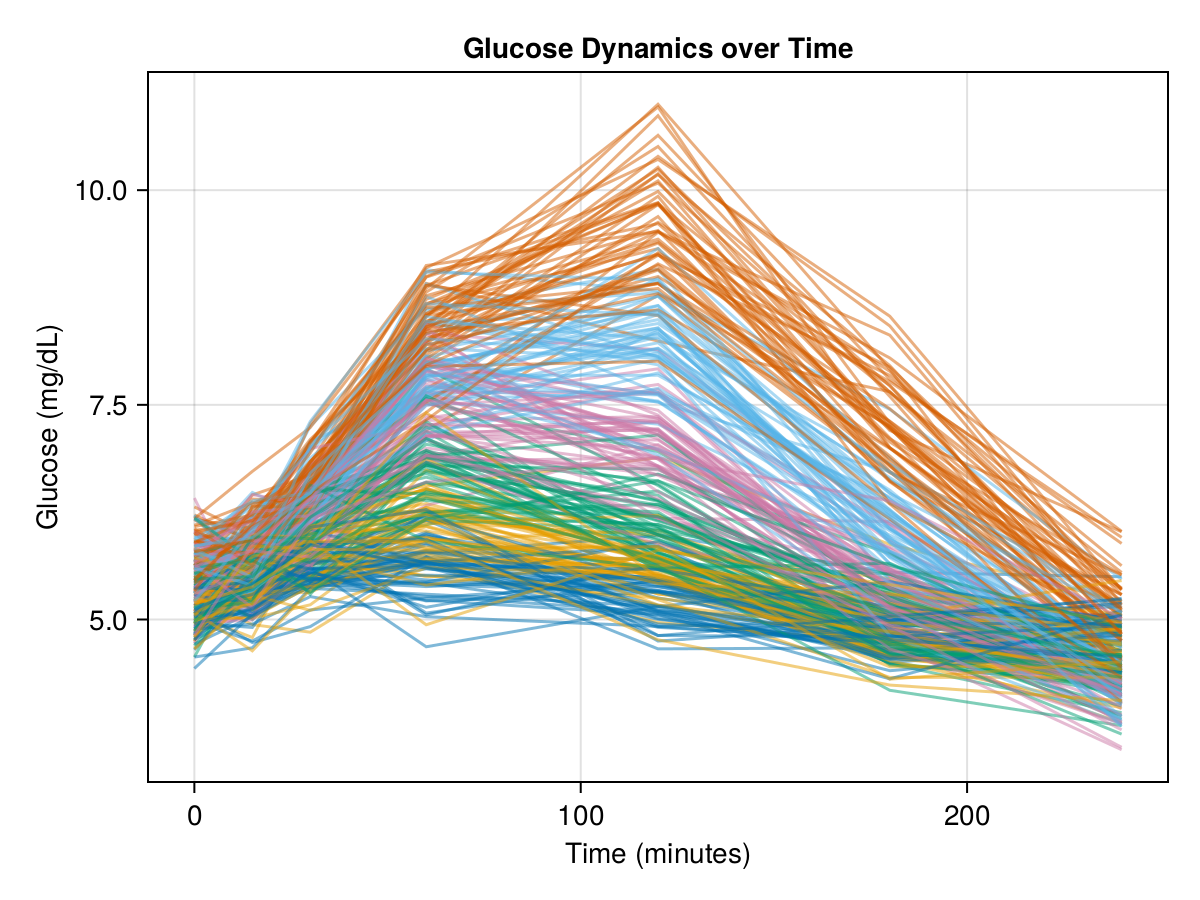

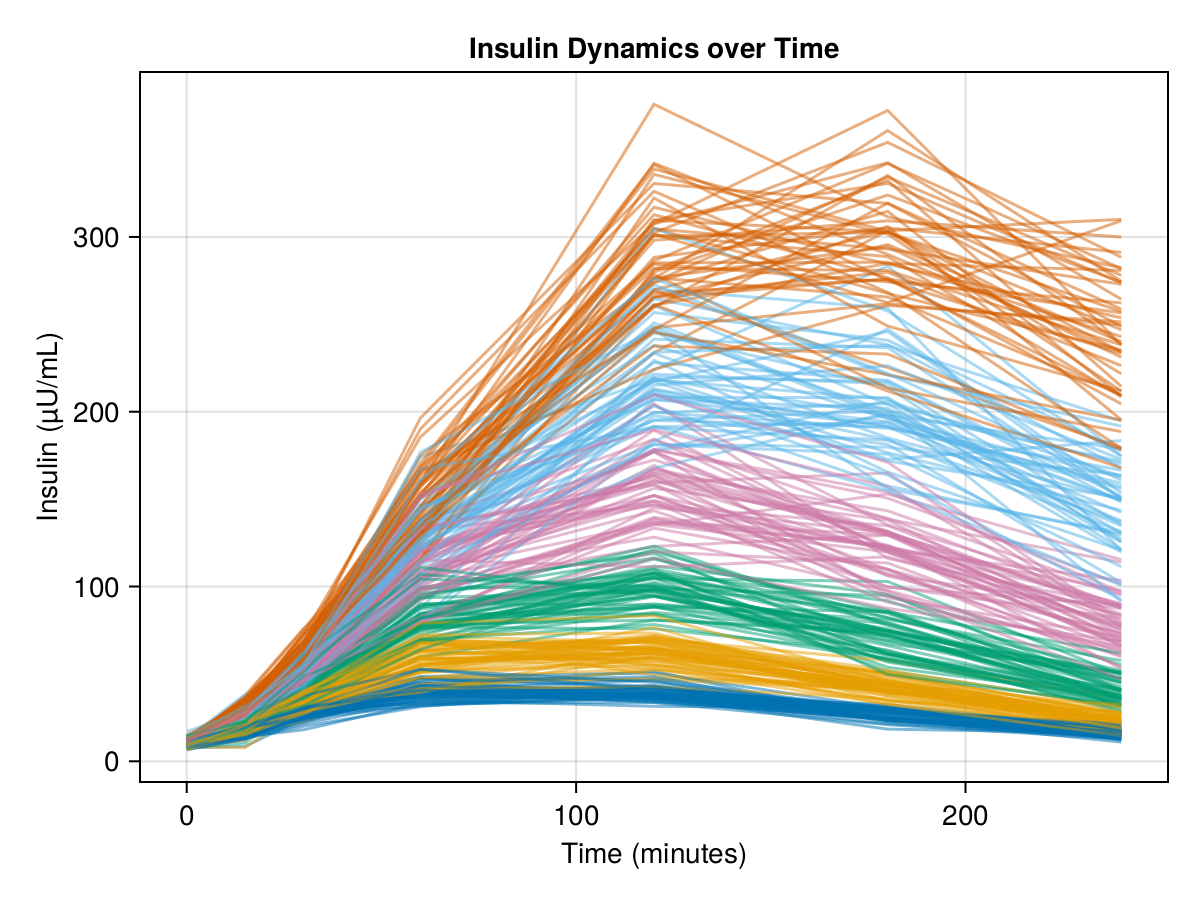

CairoMakie.Screen{IMAGE}


In [5]:
# Extract relevant columns
glucose_cols = ["glucose_t_0", "glucose_t_15", "glucose_t_30", "glucose_t_60", "glucose_t_120", "glucose_t_180", "glucose_t_240"]
insulin_cols = ["insulin_t_0", "insulin_t_15", "insulin_t_30", "insulin_t_60", "insulin_t_120", "insulin_t_180", "insulin_t_240"]
time_points = [0, 15, 30, 60, 120, 180, 240]

# Wong color palette
colors = Makie.wong_colors()
unique_times = unique(data_MIR.Long_Time)
color_map = Dict(unique_times .=> colors[1:length(unique_times)])

# Plot Glucose Dynamics
fig_glucose = Figure()
ax1 = Axis(fig_glucose[1, 1], title="Glucose Dynamics over Time", xlabel="Time (minutes)", ylabel="Glucose (mg/dL)")

for row in eachrow(data_MIR)
    glucose_values = [row[col] for col in glucose_cols]
    lines!(ax1, time_points, glucose_values, color=color_map[row.Long_Time], alpha=0.5)
end


# Plot Insulin Dynamics
fig_insulin = Figure()
ax2 = Axis(fig_insulin[1, 1], title="Insulin Dynamics over Time", xlabel="Time (minutes)", ylabel="Insulin (µU/mL)")

for row in eachrow(data_MIR)
    insulin_values = [row[col] for col in insulin_cols]
    lines!(ax2, time_points, insulin_values, color=color_map[row.Long_Time], alpha=0.5)
end

# # Save plots
# save("glucose_dynamics.png", fig_glucose)
# save("insulin_dynamics.png", fig_insulin)

# Display plots
display(fig_glucose)
display(fig_insulin)


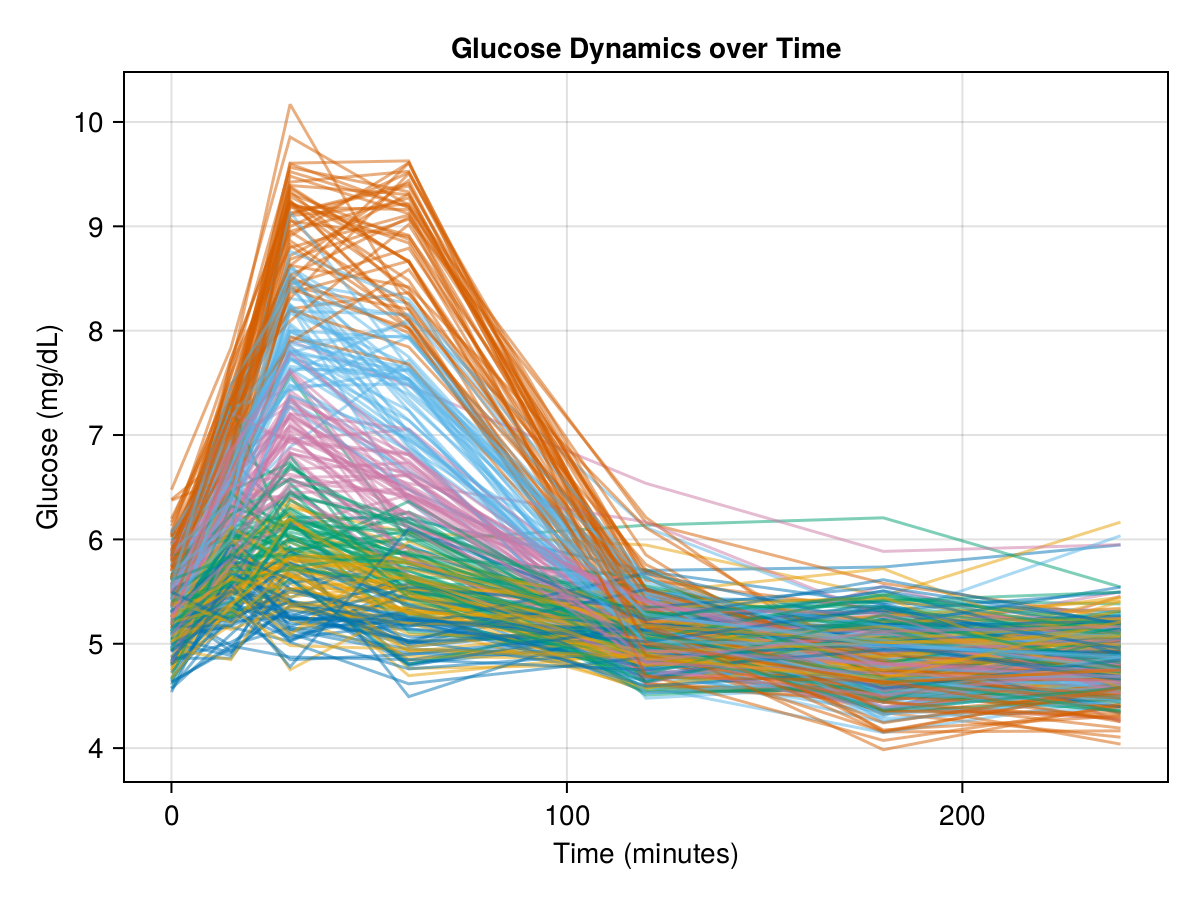

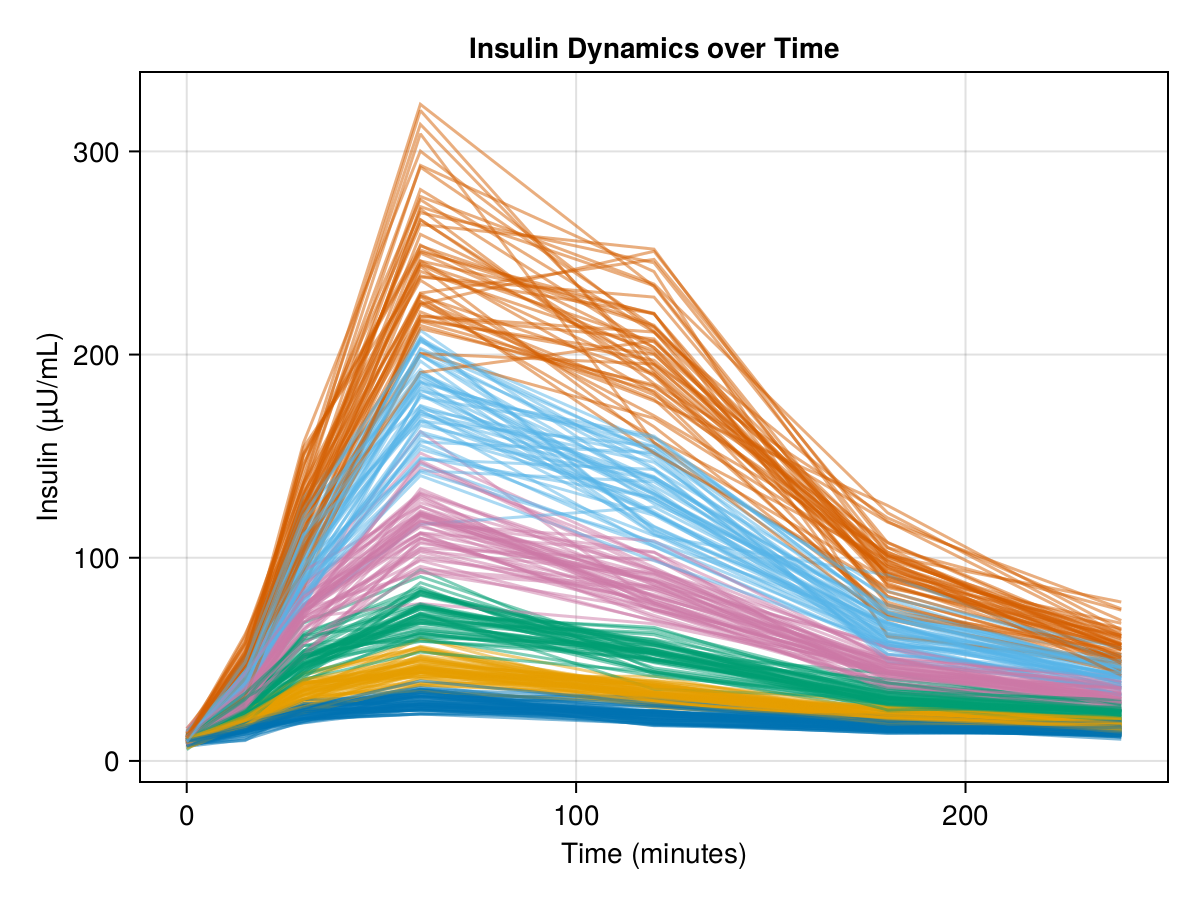

CairoMakie.Screen{IMAGE}


In [6]:
# Extract relevant columns
glucose_cols = ["glucose_t_0", "glucose_t_15", "glucose_t_30", "glucose_t_60", "glucose_t_120", "glucose_t_180", "glucose_t_240"]
insulin_cols = ["insulin_t_0", "insulin_t_15", "insulin_t_30", "insulin_t_60", "insulin_t_120", "insulin_t_180", "insulin_t_240"]
time_points = [0, 15, 30, 60, 120, 180, 240]

# Wong color palette
colors = Makie.wong_colors()
unique_times = unique(data_LIR.Long_Time)
color_map = Dict(unique_times .=> colors[1:length(unique_times)])

# Plot Glucose Dynamics
fig_glucose = Figure()
ax1 = Axis(fig_glucose[1, 1], title="Glucose Dynamics over Time", xlabel="Time (minutes)", ylabel="Glucose (mg/dL)")

for row in eachrow(data_LIR)
    glucose_values = [row[col] for col in glucose_cols]
    lines!(ax1, time_points, glucose_values, color=color_map[row.Long_Time], alpha=0.5)
end


# Plot Insulin Dynamics
fig_insulin = Figure()
ax2 = Axis(fig_insulin[1, 1], title="Insulin Dynamics over Time", xlabel="Time (minutes)", ylabel="Insulin (µU/mL)")

for row in eachrow(data_LIR)
    insulin_values = [row[col] for col in insulin_cols]
    lines!(ax2, time_points, insulin_values, color=color_map[row.Long_Time], alpha=0.5)
end

# # Save plots
# save("glucose_dynamics.png", fig_glucose)
# save("insulin_dynamics.png", fig_insulin)

# Display plots
display(fig_glucose)
display(fig_insulin)


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\20192809\.julia\packages\Makie\VRavR\src\scenes.jl:220
┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\20192809\.julia\packages\Makie\VRavR\src\scenes.jl:220


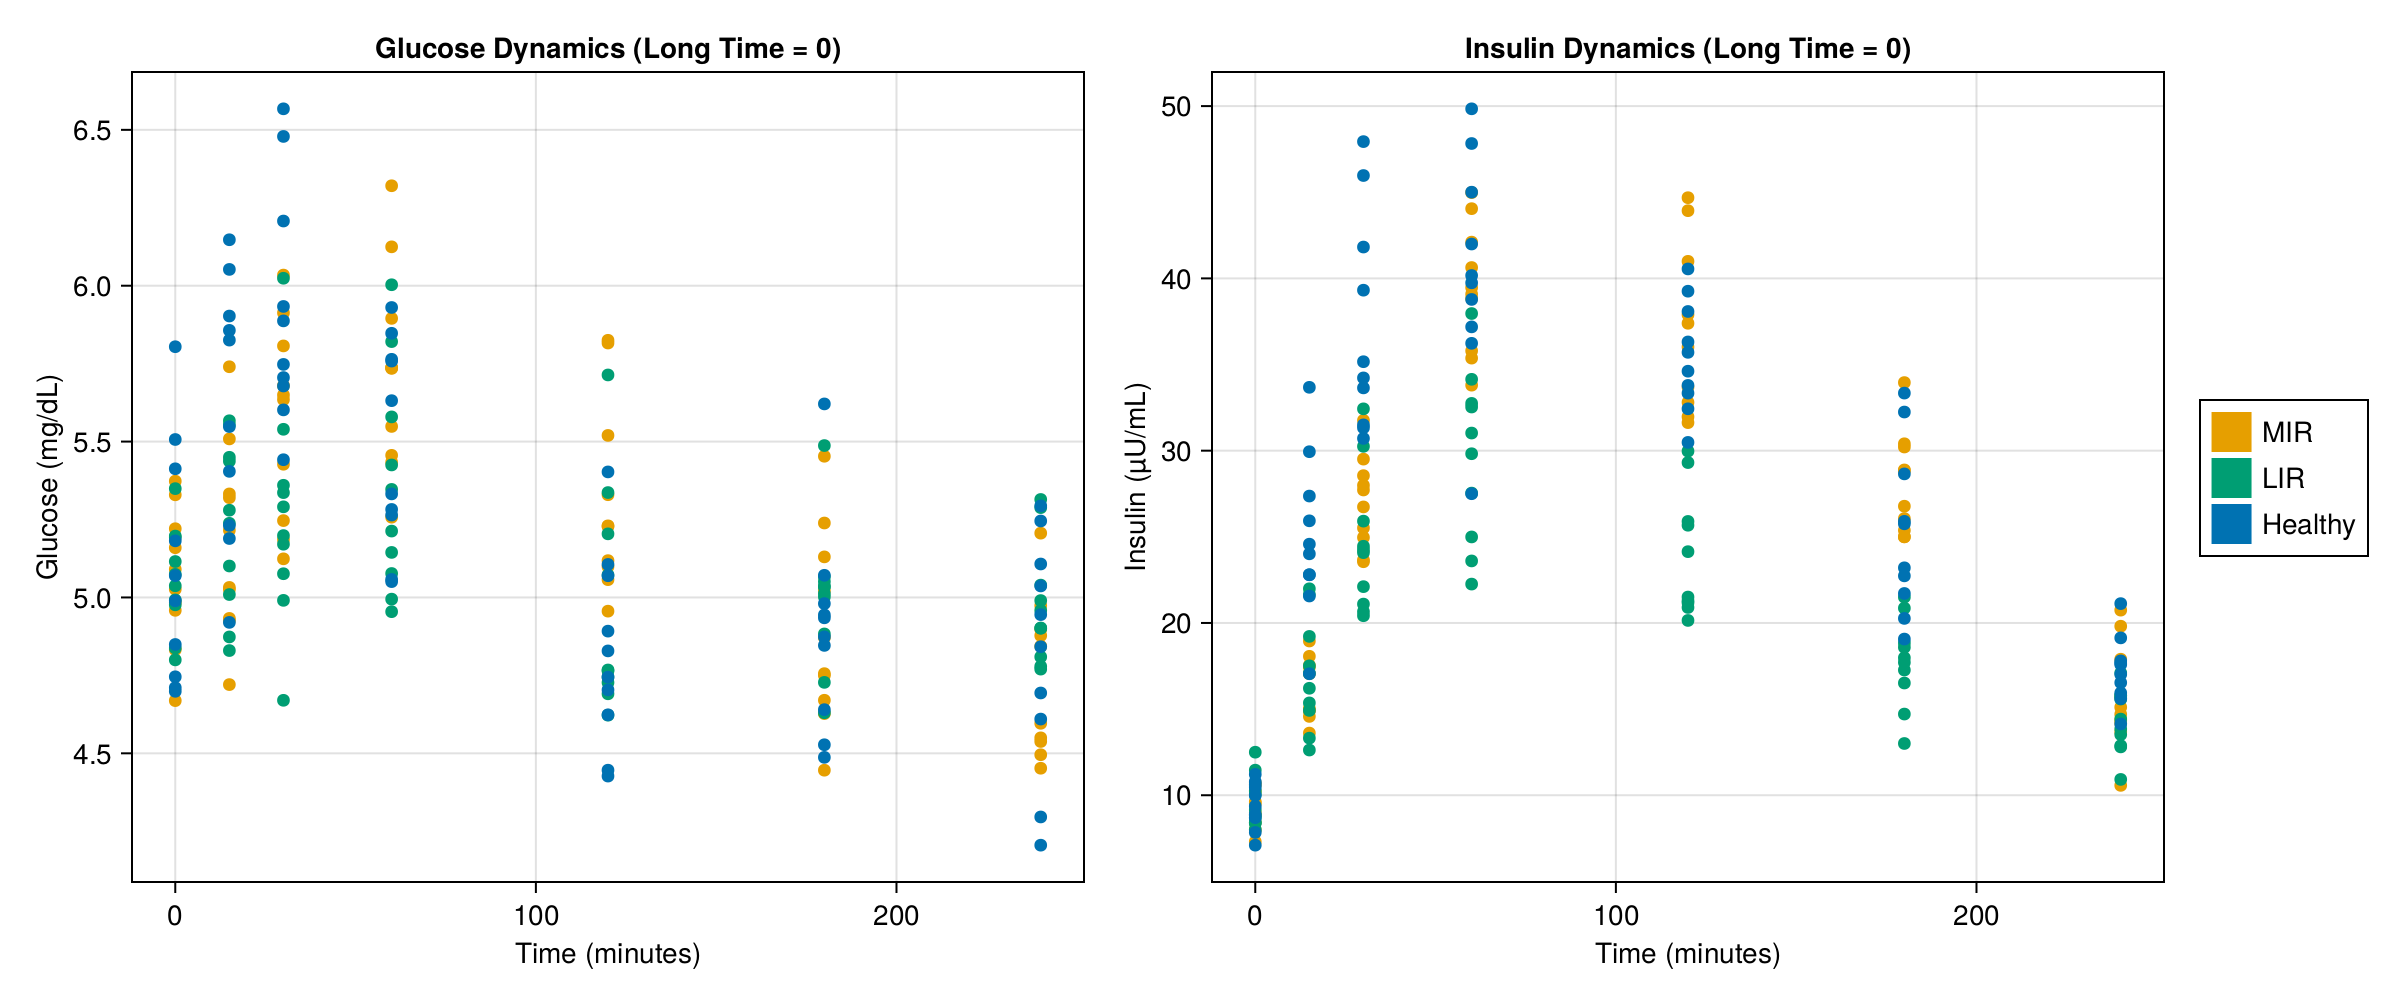

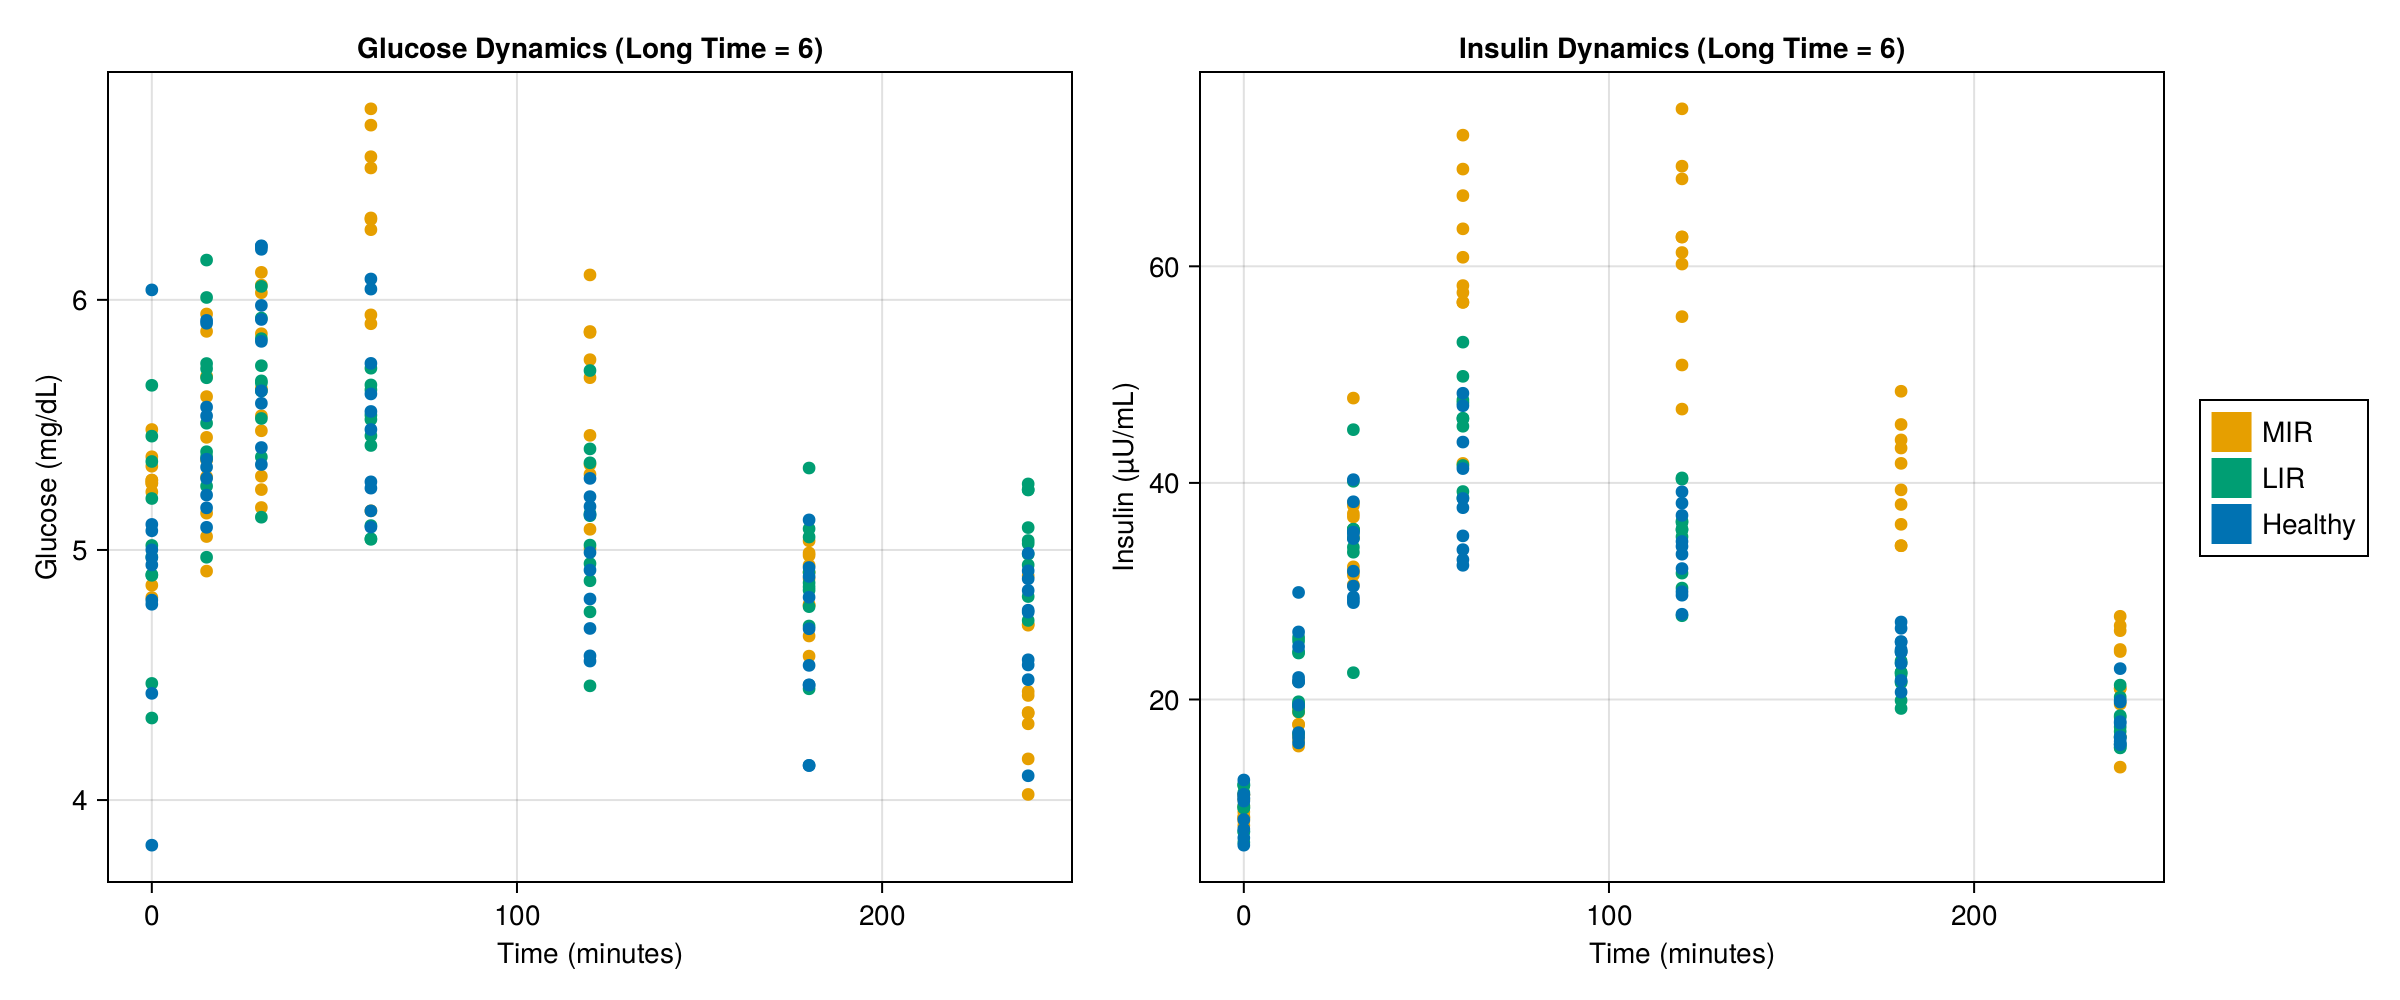

CairoMakie.Screen{IMAGE}


In [13]:
using CairoMakie, DataFrames, CSV

# Define time points and measurement columns
glucose_cols = ["glucose_t_0", "glucose_t_15", "glucose_t_30", "glucose_t_60", "glucose_t_120", "glucose_t_180", "glucose_t_240"]
insulin_cols = ["insulin_t_0", "insulin_t_15", "insulin_t_30", "insulin_t_60", "insulin_t_120", "insulin_t_180", "insulin_t_240"]
time_points = [0, 15, 30, 60, 120, 180, 240]

# Combine datasets & assign group labels
test_healthy.Group .= "Healthy"
test_MIR.Group .= "MIR"
test_LIR.Group .= "LIR"
test_all = vcat(test_healthy, test_MIR, test_LIR)

colours = Makie.wong_colors()
group_colours = Dict("Healthy" => colours[1], "MIR" => colours[2], "LIR" => colours[3])

# Function to plot glucose & insulin for a given long time point
function plot_ogtt_by_time(data::DataFrame, long_time::Int)
    subset_data = filter(row -> row.Long_Time == long_time, data)

    fig = Figure(resolution=(1200, 500))

    # Glucose Plot
    ax1 = Axis(fig[1, 1], title="Glucose Dynamics (Long Time = $long_time)", 
               xlabel="Time (minutes)", ylabel="Glucose (mg/dL)", titlefont=:bold)

    for group in keys(group_colours)
        group_data = filter(row -> row.Group == group, subset_data)
        for row in eachrow(group_data)
            glucose_values = [row[col] for col in glucose_cols]
            scatter!(ax1, time_points, glucose_values, color=group_colours[group], alpha=1)
        end
    end

    # Insulin Plot
    ax2 = Axis(fig[1, 2], title="Insulin Dynamics (Long Time = $long_time)", 
               xlabel="Time (minutes)", ylabel="Insulin (µU/mL)", titlefont=:bold)

    for group in keys(group_colours)
        group_data = filter(row -> row.Group == group, subset_data)
        for row in eachrow(group_data)
            insulin_values = [row[col] for col in insulin_cols]
            scatter!(ax2, time_points, insulin_values, color=group_colours[group], alpha=1)
        end
    end

    # Add legends
    Legend(fig[1, 3], [PolyElement(color=group_colours[g]) for g in keys(group_colours)], 
           collect(keys(group_colours)), title="Group")

    return fig
end

# Generate plots for Long_Time = 1 and Long_Time = 6
fig_long1 = plot_ogtt_by_time(test_all, 0)
fig_long6 = plot_ogtt_by_time(test_all, 6)

# Display figures
display(fig_long1)
display(fig_long6)
